# Método de Newton Para Sistemas

A seguir apresentaremos uma abordagem sucinta sobre o **Método de Newton Para Sistemas Não-Lineares**. Informações mais detalhadas podem ser obtidas em $[1]$.

Em linhas gerais o método de Newton estabelecia uma equação recursiva da forma $$ $$

$$x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})},$$

sob certas condições, convergiria para um zero $p$ de $f$ em um intervalo $(a,b)$ contendo $p$. Obviamente, a exigência da continuidade das funções $f(x)$ e $f'(x)$ fica evidentemente necessária. Além disso busca-se aplicar o método em um valor $x_{0}$ tal que $f'(x_{0}) \neq 0$ (ou até mesmo obter $(a,b)$ contendo $p$ tal que $f'(x) \neq 0$ para todo $x \in (a,b)$).

Existe uma versão mais geral do método de Newton que pode ser aplicada a um sistema de equações não lineares $m \times m$:

$$\left\{ \begin{array}{ccc}
f_{1}(x_{1},x_{2},\ldots,x_{m})	& = & 0  \\
f_{2}(x_{1},x_{2},\ldots,x_{m})	& = & 0  \\
\vdots & \vdots & \vdots \\
f_{n}(x_{1},x_{2},\ldots,x_{m})	& = & 0  \\
\end{array} \right.$$


De modo bem direto, podemos pensar a expressão $x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$ na forma matricial, isto é: $$ $$

$$[x_{n+1}] = [x_{n}] - [f'(x_{n})]^{-1}[f(x)],$$

em que $[x_{n+1}]$ e $[x_{n}]$ são matrizes coluna $m \times 1$, $[f'(x_{n})]^{-1}$ é uma matriz quadrada $m \times m$ correspondente à matriz jacobiana de das funções $f_{1},f_{2},\ldots,f_{m}$ com relação as variáveis $x_{1},x_{2},\ldots,x_{m}$ e $[f(x)]$ é uma matriz $m \times 1$ correspondente às funções $f_{1},f_{2},\ldots,f_{m}$. 

Em uma linguagem mais apropriada, temos
$$x^{(n+1)} = x^{(n)} - J_{F}^{-1}(x^{(n)})F(x^{(n)}), \,\, k\geq 0.$$

Sob certa condições, a convergência da sequência $x^{(n)}$ é assegurada, isto é, quanto $n \rightarrow \infty$ temos que $x^{(n)} \rightarrow \overline{p}$, em que $\overline{p} = (p_{1},p_{2},\ldots,p_{m})$ tal que $f_{i}(p_{1},p_{2},\ldots,p_{m})	= 0$ para todo $i = 1,2,\ldots,m$.

Vejamos a seguir exemplos para sistemas $2 \times 2$ e $3 \times 3$ juntamente com sua interpretação geomética.

## Sistemas 2x2

### <font color='blue'> Exemplo: </font>
<font color='blue'> Considere o problema de se obter a intersecção da circunferência $x^{2} + y^{2} = 9$ e elipse $\frac{x^{2}}{4} +\frac{y^{2}}{25} = 1$. A seguir temos um esboço gráfico para nos basear na escolha da $x^{(0)}$.
![](fig1.jpg)

<font color='blue'> Solução: Um ponto de partida conveniente parece ser o ponto $x^{(0)} = (2,2)^{T}$ por aparentemente estar próximo de a intersecção destacada. Contudo devemos organizar as equações na forma $f_{1}(x,y) = 0$ e $f_{2}(x,y) = 0$. Pois bem, $f_{1}(x,y) = x^{2} + y^{2} - 9$ e $f_{2}(x,y) = \frac{x^{2}}{4} + \frac{y^{2}}{25} - 1$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plotar_elipse(a, b):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = a * np.cos(theta)
    y = b * np.sin(theta)
    plt.plot(x, y, label='Elipse')

def plotar_circunferencia(raio, centro_x, centro_y):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = raio * np.cos(theta) + centro_x
    y = raio * np.sin(theta) + centro_y
    plt.plot(x, y, label='Circunferência')

# Parâmetros da elipse e da circunferência
a = 2  # Semi-eixo maior da elipse
b = 5  # Semi-eixo menor da elipse
raio = 3  # Raio da circunferência
centro_x = 0  # Coordenada x do centro da circunferência
centro_y = 0  # Coordenada y do centro da circunferência

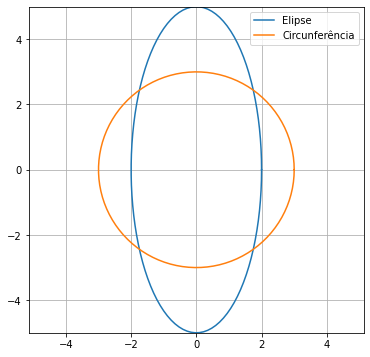

(<matplotlib.legend.Legend at 0x2b189897490>, None)

In [2]:
# Plotando a elipse e a circunferência
plt.figure(figsize=(6, 6)), plotar_elipse(a, b), plotar_circunferencia(raio, centro_x, centro_y)

# Configurações do gráfico
plt.grid(True), plt.axis('equal')
plt.xlim(-max(a, raio) - abs(centro_x), max(a, raio) + abs(centro_x))  # Ajustar limite do eixo x
plt.ylim(-max(b, raio) - abs(centro_y), max(b, raio) + abs(centro_y))  # Ajustar limite do eixo y
plt.legend(), plt.show()


Considerem que queiramos obter a intersecção das curvas 

In [ ]:
import numpy as np

def NG(x, y, tol, N, f, Jf):
    def itr(x, y, f, Jf):
        F = np.array(eval(f))  # Avalia a função
        invJF = np.linalg.inv(np.array(eval(Jf)))  # Avalia a matriz jacobiana
        return F, invJF

    delta = float('inf')

    for k in range(N):
        I0 = np.array([x, y])
        F, invJF = itr(I0[0], I0[1], f, Jf)
        I1 = I0 - np.dot(invJF, F)
        delta = np.max(np.abs(I1 - I0))
        print(f'n={k+1}, {I1}, {round(delta,8)}')
        x, y = I1
        if delta <= tol:
            break

    print(f'A solução é {np.array([x, y])} com erro {round(delta,8)}.')


In [ ]:
NG(2, 2,0.000000001, 10,'[x**2+y**2-9,(x**2)/4 + (y**2)/25 - 1]','[[2*x,2*y],[x/2,2*y/25]]')

In [ ]:
NG(-1, 1,0.01, 10,
   '[x**2 + x*y + 2*y**2-3, x + np.exp(y) - 2]',
   '[[2*x+y,x + 4*y], [1, np.exp(y)]]')

In [ ]:
import numpy as np

def NG(x, y,z, tol, N, f, Jf):
    def itr(x, y, z, f, Jf):
        F = np.array(eval(f))  # Avalia a função
        invJF = np.linalg.inv(np.array(eval(Jf)))  # Avalia a matriz jacobiana
        return F, invJF

    delta = float('inf')

    for k in range(N):
        I0 = np.array([x, y, z])
        print(I0)
        F, invJF = itr(I0[0], I0[1], I0[2], f, Jf)
        I1 = I0 - np.dot(invJF, F)
        print(I1)
        delta = np.max(np.abs(I1 - I0))
        print(f'n={k+1}, {I1}, {delta}')
        x, y, z = I1
        if delta <= tol:
            break

    print(f'A solução é {np.array([x, y,z])} com erro {delta}.')

In [ ]:
NG(0.1,0.1,-0.1,0.00001, 10,
   '[3*x-np.cos(y*z)-0.5,\
     x**2-81*(y+0.1)**2 + np.sin(z) + 1.06,\
     np.exp(-x*y)+20*z+(10*np.pi-3)/3]',
   
   '[[3,z*np.sin(y*z),y*np.sin(y*z)],\
     [2*x,-162*(y+0.1),np.cos(z)],\
     [-y*np.exp(-x*y),-x*np.exp(-x*y),20]]')

## Referências

[1] BURDEN, R.L; FAIRES, J. D. Análise Numérica. 8. ed. São Paulo: CENGAGE Learning, 2008.
